**Import Libraries**

In [62]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

**Import DataSet**

In [ ]:
df = pd.read_csv(r'C:\Users\Sunidhar\kaggle\archive\Mall_Customers.csv')

*Check wether data set is impoted sucessfully*

In [ ]:
df.head()

*Information about our dataset*

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Visualization of Data**

*plot a scatter plot to see data on graph*

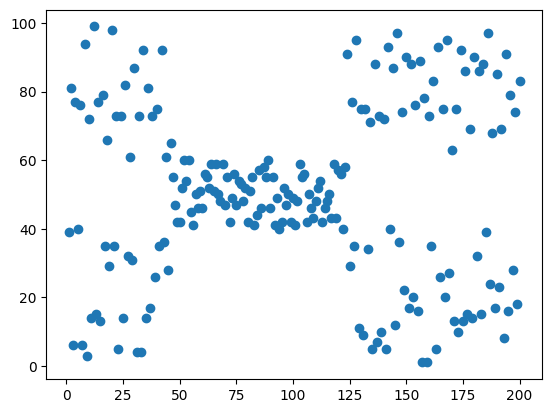

In [121]:
plt.scatter(df['CustomerID'],df['Spending Score (1-100)'])

**Implementing K Means**

*Selecting number of clusters*

In [137]:
km = KMeans(n_clusters=4)

*fitting the model*

In [138]:
y_predicted = km.fit_predict(df[['CustomerID','Spending Score (1-100)']])
y_predicted

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

*Adding cluster cloumn to Data*

In [139]:
df['cluster'] = y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0.000000,Male,19,15,0.387755,3
1,0.005025,Male,21,15,0.816327,0
2,0.010050,Female,20,16,0.051020,3
3,0.015075,Female,23,16,0.775510,0
4,0.020101,Female,31,17,0.397959,3


**Plotting the Result**

C:\Users\Sunidhar\AppData\Local\Temp\ipykernel_10168\2891453299.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


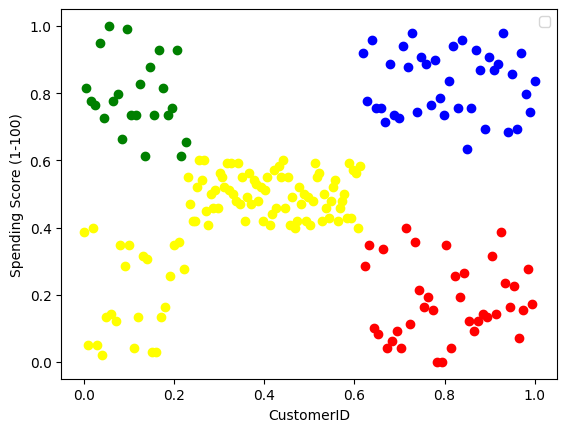

In [140]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

plt.scatter(df1.CustomerID,df1['Spending Score (1-100)'],color='green')
plt.scatter(df2.CustomerID,df2['Spending Score (1-100)'],color='blue')
plt.scatter(df3.CustomerID,df3['Spending Score (1-100)'],color='red')
plt.scatter(df4.CustomerID,df4['Spending Score (1-100)'],color='yellow')

plt.xlabel('CustomerID')
plt.ylabel('Spending Score (1-100)')
plt.legend()


**Scalling Data**

*Lets scale Customer ID and Spending Score in range from 0 to 1*

In [141]:
scaler = MinMaxScaler()
scaler.fit(df[['CustomerID']])
df['CustomerID'] = scaler.transform(df[['CustomerID']])

scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0.000000,Male,19,15,0.387755,3
1,0.005025,Male,21,15,0.816327,0
2,0.010050,Female,20,16,0.051020,3
3,0.015075,Female,23,16,0.775510,0
4,0.020101,Female,31,17,0.397959,3


**Implementing K Means on Scaled Data**

In [142]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['CustomerID','Spending Score (1-100)']])
y_predicted

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [143]:
df['cluster'] = y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0.000000,Male,19,15,0.387755,0
1,0.005025,Male,21,15,0.816327,2
2,0.010050,Female,20,16,0.051020,0
3,0.015075,Female,23,16,0.775510,2
4,0.020101,Female,31,17,0.397959,0


C:\Users\Sunidhar\AppData\Local\Temp\ipykernel_10168\2638656880.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


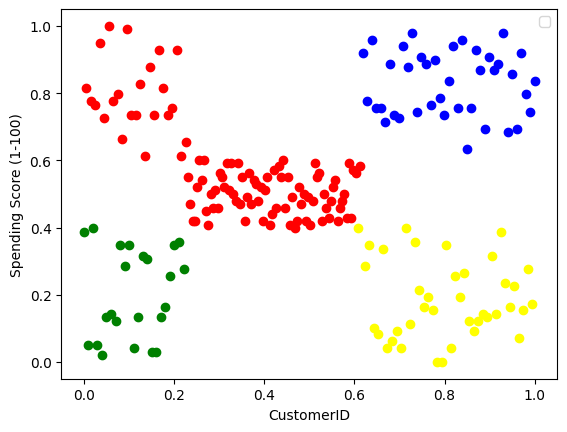

In [144]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]

plt.scatter(df1.CustomerID,df1['Spending Score (1-100)'],color='green')
plt.scatter(df2.CustomerID,df2['Spending Score (1-100)'],color='blue')
plt.scatter(df3.CustomerID,df3['Spending Score (1-100)'],color='red')
plt.scatter(df4.CustomerID,df4['Spending Score (1-100)'],color='yellow')
plt.scatter(df5.CustomerID,df5['Spending Score (1-100)'],color='brown')
plt.scatter(df6.CustomerID,df6['Spending Score (1-100)'],color='purple')

plt.xlabel('CustomerID')
plt.ylabel('Spending Score (1-100)')
plt.legend()

**Elbow Method**

In [145]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['CustomerID','Spending Score (1-100)']])
    sse.append(km.inertia_)
sse

[30.651746864267203,
 20.795968893785833,
 10.591797327979496,
 7.050373654383596,
 3.878586782602543,
 3.0476155682274677,
 2.674124057214822,
 2.494199326350705,
 2.3823757163149866]

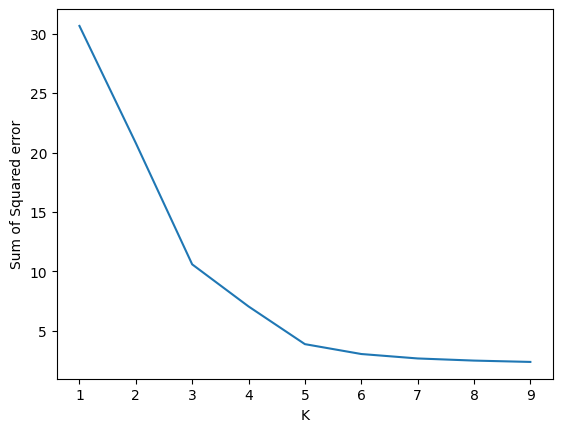

In [146]:
plt.xlabel('K')
plt.ylabel('Sum of Squared error')
plt.plot(k_rng,sse)

**Final Implementation**

*choosing K = 5 for Elbow Method*

In [117]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['CustomerID','Spending Score (1-100)']])
y_predicted

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [118]:
df['cluster'] = y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0.000000,Male,19,15,0.387755,1
1,0.005025,Male,21,15,0.816327,3
2,0.010050,Female,20,16,0.051020,1
3,0.015075,Female,23,16,0.775510,3
4,0.020101,Female,31,17,0.397959,1


C:\Users\Sunidhar\AppData\Local\Temp\ipykernel_10168\612902334.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


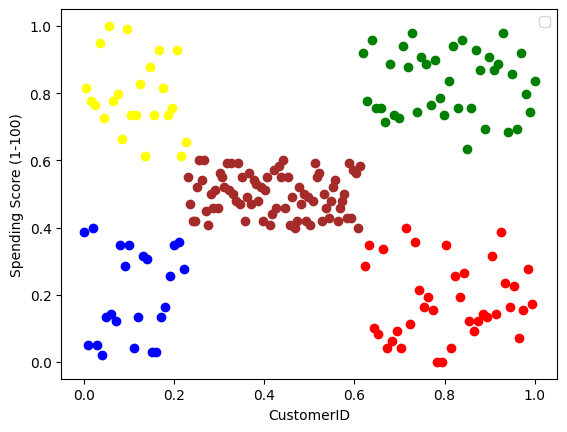

In [119]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.scatter(df1.CustomerID,df1['Spending Score (1-100)'],color='green')
plt.scatter(df2.CustomerID,df2['Spending Score (1-100)'],color='blue')
plt.scatter(df3.CustomerID,df3['Spending Score (1-100)'],color='red')
plt.scatter(df4.CustomerID,df4['Spending Score (1-100)'],color='yellow')
plt.scatter(df5.CustomerID,df5['Spending Score (1-100)'],color='brown')

plt.xlabel('CustomerID')
plt.ylabel('Spending Score (1-100)')
plt.legend()